# Time Series Forecasting with Python (ARIMA, LSTM, Prophet)

In [2]:
!pip install pmdarima --user

  Using cached pmdarima-1.7.1-cp36-cp36m-win_amd64.whl (608 kB)
  Using cached setuptools-49.6.0-py3-none-any.whl (803 kB)
  Using cached statsmodels-0.11.1-cp36-none-win_amd64.whl (8.2 MB)
  Using cached scikit_learn-0.23.2-cp36-cp36m-win_amd64.whl (6.8 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet. Let's jump in and start with ARIMA.

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

## Prophet

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[Facebook's Prophet Web Page](https://facebook.github.io/prophet/)<br>
[Forecasting at Scale](https://peerj.com/preprints/3190.pdf)


# FORECAST

## Read Dataset

In [6]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')

In [7]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [9]:
df.Month = pd.to_datetime(df.Month)

In [10]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [11]:
df.index.freq = 'MS'

[Text(0, 0.5, 'Total Production'), Text(0.5, 0, 'Dates')]

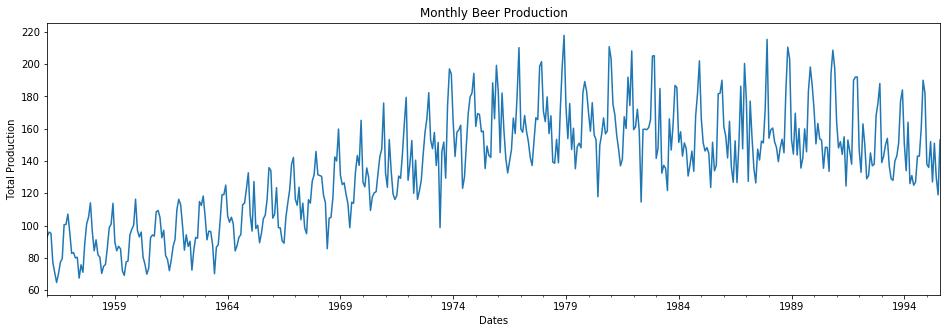

In [12]:
ax = df['Monthly beer production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production')

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

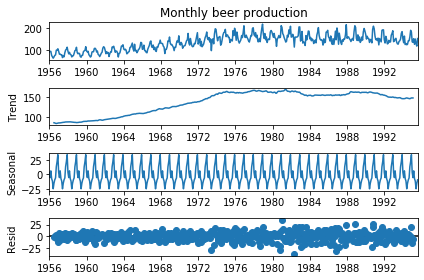

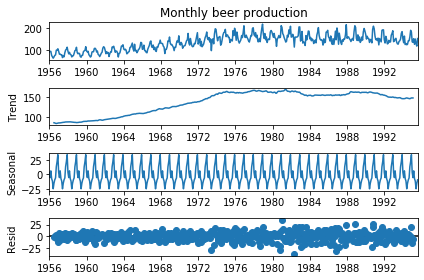

In [13]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot()

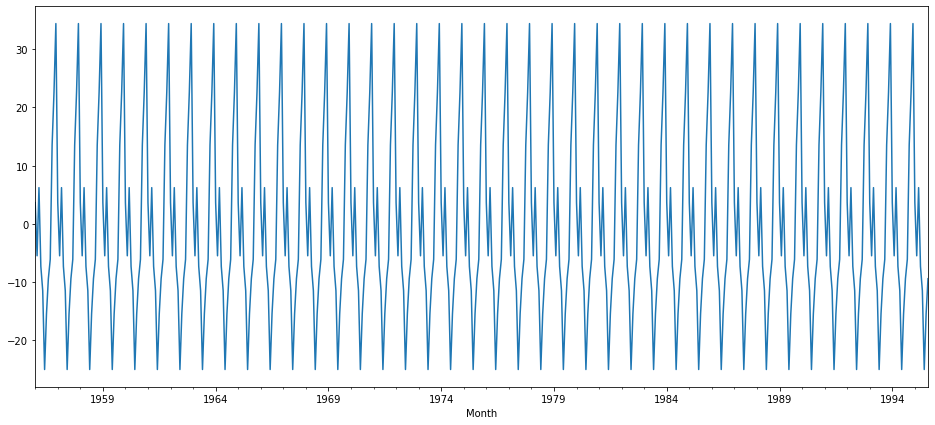

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot()

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [ ]:
auto_arima(df['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

Let's split the data into train and test set

In [195]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [32]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, 3, 12)   Log Likelihood               -1708.054
Date:                            Sat, 22 Jun 2019   AIC                           3438.108
Time:                                    10:18:51   BIC                           3483.623
Sample:                                01-01-1956   HQIC                          3456.026
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1219      0.042     -2.871      0.004      -0.205      -0.039
ar.L2         -0.1688      0.047     -3.609      0.000      -0.260      -0.077
ma.L1         -0.8450      0.028    -30.242      0.000      -0.900      -0.790
ar.S.L12       1.7554      0.104     16.882      0.000       1.552       1.959
ar.S.L24      -1.6110      0.198     -8.135      0.000      -1.999      -1.223
ar.S.L36       0.7901      0.151      5.240      0.000       0.495       1.086
ar.S.L48       0.0643      0.051      1.250      0.211      -0.036       0.165
ma.S.L12      -1.5547      0.120    -12.931      0.000      -1.790      -1.319
ma.S.L24       1.3915      0.200      6.946      0.000       0.999       1.784
ma.S.L36      -0.6615      0.116     -5.700      0.000      -0.889      -0.434
sigma2        84.5137      4.982     16.964      0.000      74.749      94.278
===================================================================================
Ljung-Box (Q):                       93.25   Jarque-Bera (JB):                41.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.08   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.008405
1994-10-01    157.758778
1994-11-01    181.853430
1994-12-01    183.584877
1995-01-01    144.878746
1995-02-01    136.895118
1995-03-01    151.207671
1995-04-01    133.210529
1995-05-01    137.955201
1995-06-01    120.568059
1995-07-01    128.416710
1995-08-01    138.858134
Freq: MS, Name: ARIMA Predictions, dtype: float64

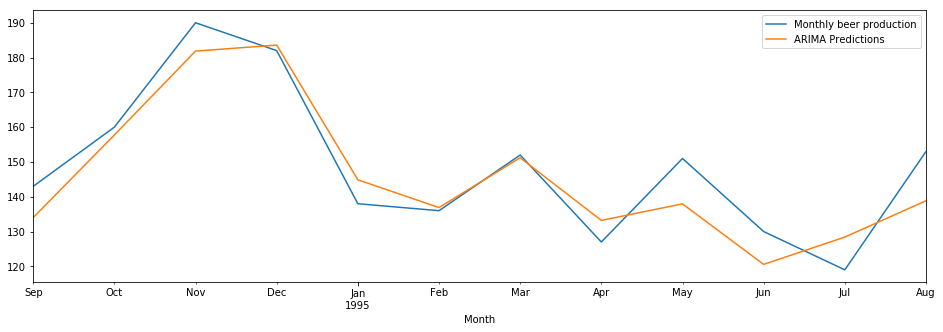

In [37]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [39]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.82185314073244
RMSE Error: 8.113066814758303
Mean: 136.39537815126045


In [196]:
test_data['ARIMA_Predictions'] = arima_pred

## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [43]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

Using TensorFlow backend.


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
lstm_model.fit_generator(generator,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
452/452 [==============================] - 9s 21ms/step - loss: 0.0261
Epoch 2/20
452/452 [==============================] - 8s 19ms/step - loss: 0.0140
Epoch 3/20
452/452 [==============================] - 10s 21ms/step - loss: 0.0103
Epoch 4/20
452/452 [==============================] - 11s 24ms/step - loss: 0.0099
Epoch 5/20
452/452 [==============================] - 8s 19ms/step - loss: 0.0080
Epoch 6/20
452/452 [==============================] - 8s 19ms/step - loss: 0.0081
Epoch 7/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0081
Epoch 8/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0075
Epoch 9/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0069
Epoch 10/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0066
Epoch 11/20
452/452 [==============================] - 10s 22ms/step - loss: 0.0070
Epoch 12/20
452/452 [========================

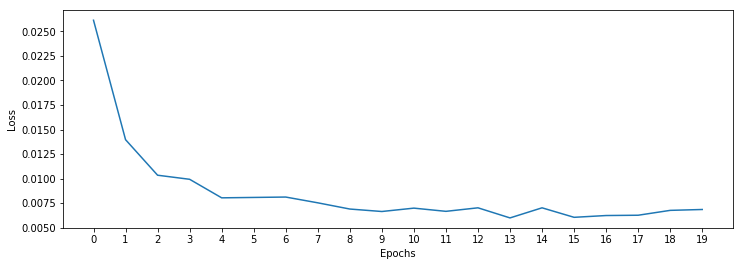

In [55]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [59]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [60]:
lstm_predictions_scaled

[array([0.5164761], dtype=float32),
 array([0.6005075], dtype=float32),
 array([0.72476846], dtype=float32),
 array([0.72167337], dtype=float32),
 array([0.5429983], dtype=float32),
 array([0.51433825], dtype=float32),
 array([0.5691196], dtype=float32),
 array([0.4371619], dtype=float32),
 array([0.43787313], dtype=float32),
 array([0.42071435], dtype=float32),
 array([0.44136357], dtype=float32),
 array([0.49209848], dtype=float32)]

In [61]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [62]:
lstm_predictions

array([[143.82084249],
       [156.67764716],
       [175.68957435],
       [175.21602552],
       [147.87874203],
       [143.493753  ],
       [151.87529461],
       [131.68576958],
       [131.79458814],
       [129.16929533],
       [132.32862668],
       [140.09106751]])

In [197]:
test_data['LSTM_Predictions'] = lstm_predictions

In [198]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,134.008405,143.820842
1994-10-01,160.0,157.758778,156.677647
1994-11-01,190.0,181.853430,175.689574
1994-12-01,182.0,183.584877,175.216026
1995-01-01,138.0,144.878746,147.878742
1995-02-01,136.0,136.895118,143.493753
1995-03-01,152.0,151.207671,151.875295
1995-04-01,127.0,133.210529,131.685770
1995-05-01,151.0,137.955201,131.794588


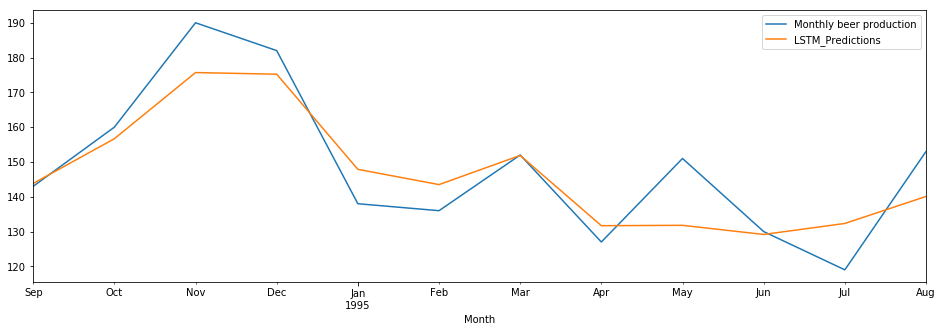

In [68]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [121]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 96.00591760115354
RMSE Error: 9.79826094779852
Mean: 136.39537815126045


## Prophet Forecast

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 1 columns):
Monthly beer production    476 non-null float64
dtypes: float64(1)
memory usage: 7.4 KB


In [182]:
df_pr = df.copy()
df_pr = df.reset_index()

In [183]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [184]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [133]:
from fbprophet import Prophet

In [134]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [135]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.225996,130.653845,155.362309,151.183152,151.283044,-8.002742,-8.002742,-8.002742,-8.002742,-8.002742,-8.002742,0.0,0.0,0.0,143.223254
472,1995-05-01,151.163858,127.310385,151.051901,151.094166,151.242775,-11.377710,-11.377710,-11.377710,-11.377710,-11.377710,-11.377710,0.0,0.0,0.0,139.786149
473,1995-06-01,151.099649,114.956315,140.779594,151.010615,151.201043,-23.836281,-23.836281,-23.836281,-23.836281,-23.836281,-23.836281,0.0,0.0,0.0,127.263368
474,1995-07-01,151.037511,123.325599,147.917333,150.911795,151.165261,-15.756947,-15.756947,-15.756947,-15.756947,-15.756947,-15.756947,0.0,0.0,0.0,135.280564
475,1995-08-01,150.973302,128.990562,153.870263,150.817150,151.120431,-9.175006,-9.175006,-9.175006,-9.175006,-9.175006,-9.175006,0.0,0.0,0.0,141.798296


In [136]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [137]:
prophet_pred = prophet_pred.set_index("Date")

In [138]:
prophet_pred.index.freq = "MS"

In [139]:
prophet_pred

,Pred
Date,
1994-09-01,145.128028
1994-10-01,166.249471
1994-11-01,173.812765
1994-12-01,186.077000
1995-01-01,155.337051
1995-02-01,146.937841
1995-03-01,159.099309
1995-04-01,143.223254
1995-05-01,139.786149


In [199]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [144]:
import seaborn as sns

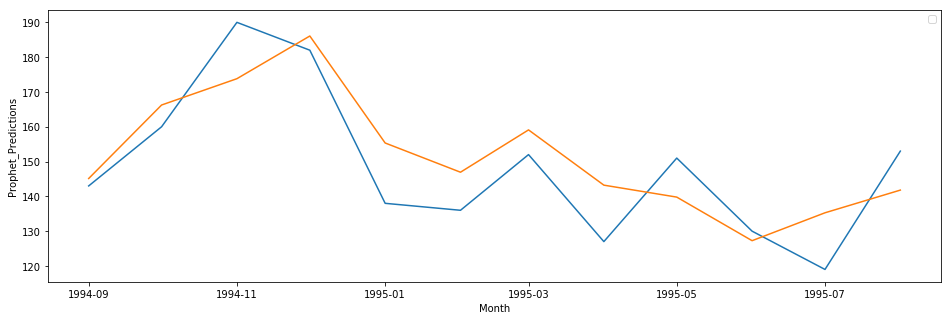

In [163]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [202]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.650946999156
RMSE Error: 11.473924655459264
Mean: 136.39537815126045


In [203]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

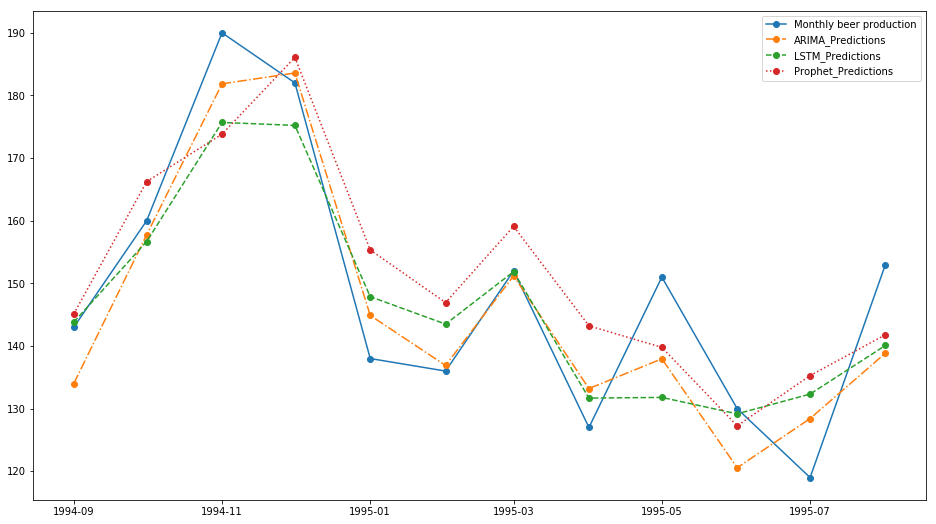

In [224]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [228]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.113067,65.821853
1,LSTM,9.798261,96.005918
2,Prophet,11.473925,131.650947


In [226]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
Month,,,,
1994-09-01,143.0,134.008405,143.820842,145.128028
1994-10-01,160.0,157.758778,156.677647,166.249471
1994-11-01,190.0,181.853430,175.689574,173.812765
1994-12-01,182.0,183.584877,175.216026,186.077000
1995-01-01,138.0,144.878746,147.878742,155.337051
1995-02-01,136.0,136.895118,143.493753,146.937841
1995-03-01,152.0,151.207671,151.875295,159.099309
1995-04-01,127.0,133.210529,131.685770,143.223254
1995-05-01,151.0,137.955201,131.794588,139.786149


Don't forget they are just quick and basic predictions so you can improve these models with tuning and according to your data and business knowledge.

<br>

Thanks!